In [25]:
import sys
import os

# Naik satu level ke folder utama proyek (Program, sebelumnya folder preprocessing)
sys.path.append(os.path.abspath("..")) # Agar bisa import modul folder lain karena berada di root utama

In [12]:
from features_extraction.lbp import LBP
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import cv2

Features_extraction package loaded!


In [26]:
BASE_DIR = os.path.abspath("..")  # Naik satu level ke root proyek
# path ke dataset
dataset_path = os.path.join(BASE_DIR, "dataset") # Agar folder dataset dapat dibaca

In [27]:
'''
FUNGSI GENERAL PREPROCESSING UNTUK MELAKUKAN PREPROCESSING SECARA UMUM SEBELUM MASUK KE SPESIFIK PREPROCESSING
'''

def general_preprocessing(image_path):
    # Load image
    image = cv2.imread(image_path)
    
    # Konversi ke grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Resize image
    resize_image = cv2.resize(gray_image, (128,128), interpolation=cv2.INTER_CUBIC)
    
    return resize_image

In [15]:
# Kelas berdasarkan nama folder
classes = ["Overripe", "Ripe", "Unripe"]

# Menyimpan data gambar dan label
data = []
labels = []

# Iterasi setiap kelas
for label, category in enumerate(classes):
    folder_path = os.path.join(dataset_path, f'{category}/cropped')
    # print(folder_path)
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        # print(file_path)
        image = general_preprocessing(file_path)
        
        # Menyimpan data
        data.append(image)
        labels.append(label)

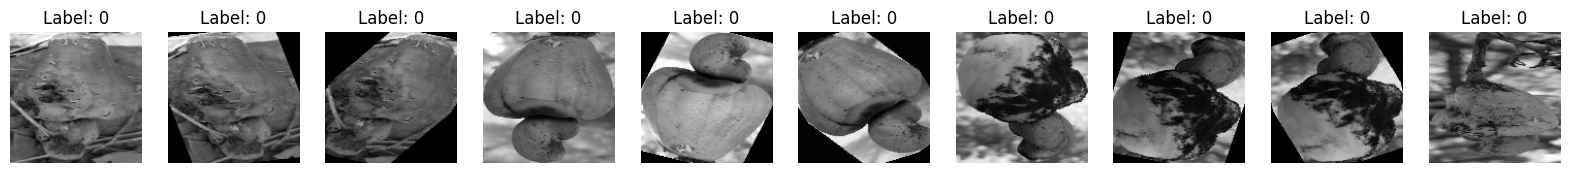

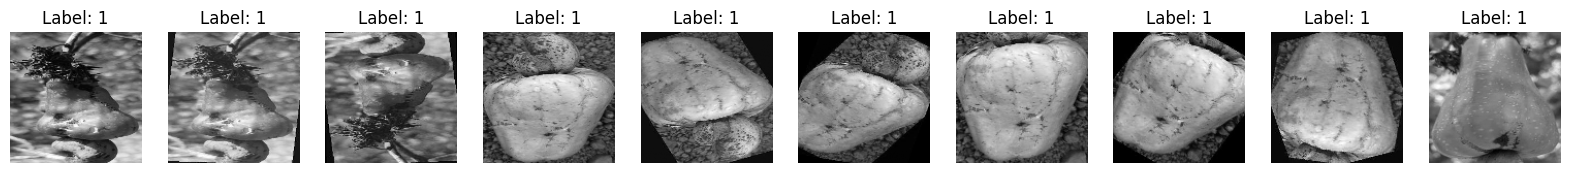

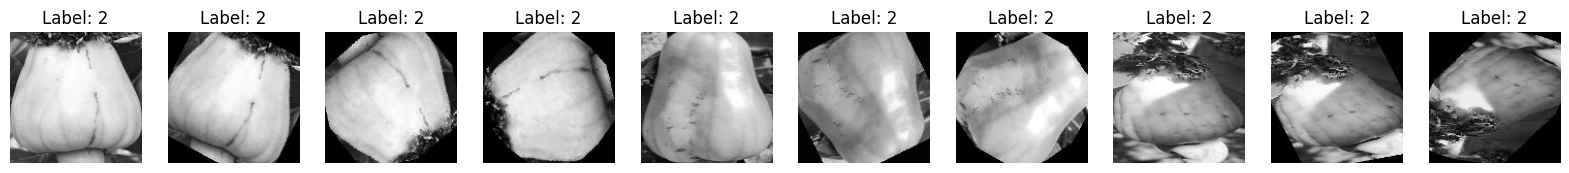

In [16]:
# Menampilkan 10 contoh gambar pertama
num_samples = 10
plt.figure(figsize=(20, 10))

# 10 Label 0 (Overripe)
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(data[i], cmap="gray")  # cmap="gray" agar sesuai dengan grayscale
    plt.title(f"Label: {labels[i]}")
    plt.axis("off")

plt.show()

plt.figure(figsize=(20, 10))
# 10 Label 1 (Ripe)
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(data[370+i], cmap="gray")  # cmap="gray" agar sesuai dengan grayscale
    plt.title(f"Label: {labels[370+i]}")
    plt.axis("off")

plt.show()

plt.figure(figsize=(20, 10))
# 10 Label 2 (Unripe)
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(data[781+i], cmap="gray")  # cmap="gray" agar sesuai dengan grayscale
    plt.title(f"Label: {labels[781+i]}")
    plt.axis("off")

plt.show()

In [28]:
tst = pd.DataFrame(data[2])
tst

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
lbp_features = []

for img in range(len(data)):
    lbp_calculator = LBP(radius=1, neighbors=8)
    lbp_img = lbp_calculator.calculate_lbp(data[img])
    histogram = lbp_calculator.get_histogram(lbp_img)
    features = lbp_calculator.get_features(histogram)
    uniform_pattern = lbp_calculator.get_uniform_pattern(lbp_img)
    rotation_invariant_features = lbp_calculator.get_rotation_invariant_features(lbp_img)

    features_statistical = lbp_calculator.get_statistical_features(features)
    uniform_pattern_statistical = lbp_calculator.get_statistical_features(uniform_pattern)
    rotation_invariant_features_statistical = lbp_calculator.get_statistical_features(rotation_invariant_features)

    lbp_features.append([features_statistical, uniform_pattern_statistical, rotation_invariant_features_statistical])

In [9]:
data_list = []
for i, fitur in enumerate(lbp_features):
    # nama_file = daftar_nama_file[i]
    data_list.append({
        "images": f'img-{i}',
        "histogram_mean": fitur[0][0],
        "histogram_std": fitur[0][1],
        "histogram_skewness": fitur[0][2],
        "histogram_kurtosis": fitur[0][3],
        "uniform_pattern_mean": fitur[1][0],
        "uniform_pattern_std": fitur[1][1],
        "uniform_pattern_skewness": fitur[1][2],
        "uniform_pattern_kurtosis": fitur[1][3],
        "rotation_invariant_mean": fitur[2][0],
        "rotation_invariant_std": fitur[2][1],
        "rotation_invariant_skewness": fitur[2][2],
        "rotation_invariant_kurtosis": fitur[2][3]
    })

In [30]:
df_lbp = pd.DataFrame(data_list).set_index('images')

NameError: name 'data_list' is not defined

In [29]:
df_lbp

NameError: name 'df_lbp' is not defined

In [13]:
df_lbp.to_csv("lbp_features.csv", index=False)